## Domanda 1

In [51]:
%%capture
%run Intelligenza_Artificiale_Lab3.ipynb
# eseguo il notebook del lab 3 per definire tutte le funzioni necessarie
# catturandone l'output per evitare di mostrarlo (non serve)

r5 = RouteProblem('T', 'B', map=romania)

In [52]:
# potrebbe dare errore sulle variabili ma funziona, i stg
print("Greedy search: " + str(path_states(greedy_bfs(r5))))
print("A* search: " + str(path_states(astar_search(r5))))
print("||||||||||||||||||||||||||||||||||||||||||||||||||")
report([greedy_bfs, astar_search], [r5], False)

Greedy search: ['T', 'L', 'M', 'D', 'C', 'P', 'B']
A* search: ['T', 'A', 'S', 'R', 'P', 'B']
||||||||||||||||||||||||||||||||||||||||||||||||||
greedy_bfs:
       14 nodes |        7 goal |  615 cost |      12 actions | TOTAL

astar_search:
       26 nodes |       11 goal |  536 cost |      15 actions | TOTAL



## Domanda 2

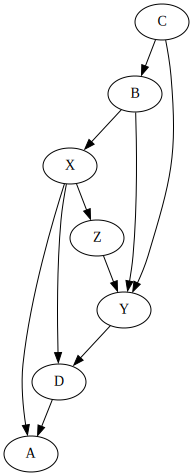

In [53]:
import collections.abc
# causalgraphicalmodels needs the Iterable abstract class from collections, which was removed with Python 3.10
# so we need to get it from collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel

n1 = CausalGraphicalModel(
    nodes=['A','B','C','D','X','Y','Z'],
    edges=[('X','Z'),('Z','Y'),('X','A'),('X','D'),('D','A'),('Y','D'),('B','X'),('B','Y'),('C','B'),('C','Y')]
)

n1.draw()

In [54]:
n1.is_d_separated('Z','D',{'B','C','X','Y'})

True

In [55]:
n1.get_all_backdoor_adjustment_sets('Z','D')

frozenset({frozenset({'X'}),
           frozenset({'B', 'X'}),
           frozenset({'C', 'X'}),
           frozenset({'B', 'C', 'X'})})

In [56]:
# CausalGraphicalModels non ha metodi per trovare il Markov Blanket, quindi bisogna usare pyAgrum
# LMFAO

from IPython.display import display, Math, Latex

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

n1 = gum.fastBN("X->Z->Y->D->A;X->A;X->D;C->B->X;B->Y;C->Y")
cn1 = csl.CausalModel(n1)

gnb.flow.row(n1)

In [57]:
gum.MarkovBlanket(n1, 'Z')

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x00000254681B2EB0> >

## Domanda 3

In [58]:
offer = CausalGraphicalModel(
    nodes=['Experience','Grades','Interview','Offer'],
    edges=[('Experience','Interview'),('Grades','Interview'),('Interview','Offer')]
)

In [59]:
print(offer.get_distribution())

P(Experience)P(Grades)P(Interview|Experience,Grades)P(Offer|Interview)


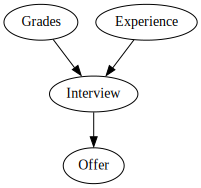

In [60]:
offer.draw()

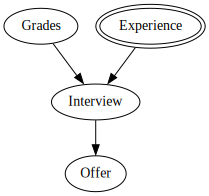

In [61]:
new_offer = offer.do('Experience')
new_offer.draw()